A total number of **1,354** raw images were captured manually from  Melandaha, Jamalpur with the help of an agriculture expert from July to September 2024. The images were captured using an iPhone 14 Plus with a resolution of **800×800** pixels to ensure quality visual data for training and evaluation. Further enhancement of the dataset was made by generating **9,000 augmented images** using different augmentation techniques: **flipping, rotation, zoom, shear, and brightness**. This, in turn, makes the dataset even more diverse, which enhances the performance of deep learning models across different scenarios.


**9 clasificaciones:**
- Anthracnose: Antracnosis
- Bacterial blight: Mancha bacteriana
- Citrus canker: Cancro de los cítricos
- Curl virus: Virus del enrollamiento
- Deficiency leaf: Hoja con deficiencias
- Dry leaf: Hoja seca
- Healthy leaf: Hoja sana
- Sooty mould: Moho negro (fumagina)
- Spider mites: Ácaros rojos
<br>

**Descripción de enfermedades:**
- Anthracnose/Antracnosis: Enfermedad fúngica que provoca manchas marrones o negras hundidas en las hojas, ramas y frutos; puede causar caída prematura de las hojas.
- Bacterial blight/Mancha bacteriana: Infección bacteriana que genera manchas acuosas oscuras en las hojas, que luego se tornan marrones y secas, causando daño severo al follaje.
- Citrus canker/Cancro de los cítricos: Enfermedad bacteriana altamente contagiosa que causa lesiones circulares con bordes elevados en hojas, ramas y frutos; puede provocar la caída de hojas y pérdida de producción.
- Curl virus/Virus del enrollamiento: Infección viral que hace que las hojas se enrosquen, arruguen y muestren un crecimiento distorsionado; también puede debilitar el árbol y reducir el rendimiento.
- Deficiency leaf/Hoja con deficiencias: Signos visibles de deficiencia nutricional (como falta de nitrógeno, hierro o zinc), que pueden manifestarse como amarillamiento, manchas o malformaciones en las hojas.
- Dry leaf/Hoja seca: Condición en la que las hojas se tornan secas, quebradizas y a menudo marrones, causada por estrés hídrico, exceso de sol o enfermedades.
- Sooty mould/Moho negro (fumagina): Hongo negro superficial que crece sobre la melaza excretada por plagas (como pulgones o cochinillas); aunque no infecta directamente la hoja, bloquea la fotosíntesis al cubrirla.
- Spider mites/Ácaros rojos: Pequeños ácaros que se alimentan de la savia de las hojas, dejando manchas amarillas y una apariencia moteada; una infestación severa puede provocar secado y caída del follaje.

# Dataset original

In [4]:
import os
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import cv2

                  Cantidad de imágenes
Anthracnose                        100
Bacterial Blight                   105
Citrus Canker                      178
Curl Virus                         115
Deficiency Leaf                    193
Dry Leaf                           186
Healthy Leaf                       210
Sooty Mould                        153
Spider Mites                       114


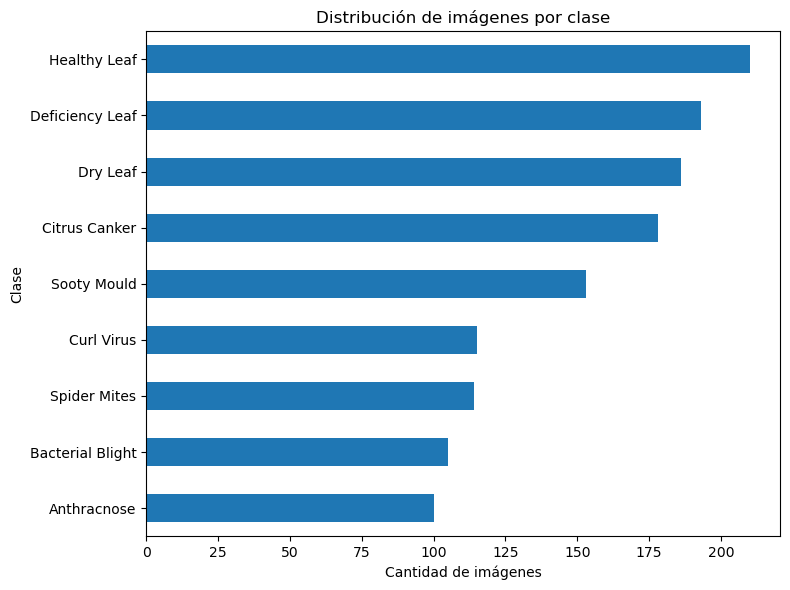

Tamaños más comunes:
(1000, 1000)    45
Name: count, dtype: int64


In [2]:
dataset_path = './data/Original Dataset'

# Obtener nombres de clases
clases = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Contar imágenes por clase
conteo = {}
tamaños = []

for clase in clases:
    carpeta = os.path.join(dataset_path, clase)
    imagenes = [f for f in os.listdir(carpeta) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    conteo[clase] = len(imagenes)
    
    for img_file in imagenes[:5]:  # analizamos las primeras 5 imágenes por clase
        img_path = os.path.join(carpeta, img_file)
        with Image.open(img_path) as img:
            tamaños.append(img.size)  # (ancho, alto)

# Mostrar conteo por clase
df_conteo = pd.DataFrame.from_dict(conteo, orient='index', columns=['Cantidad de imágenes'])
print(df_conteo)

# Visualizar clases con gráfico de barras
df_conteo.sort_values('Cantidad de imágenes').plot(kind='barh', figsize=(8, 6), legend=False)
plt.title('Distribución de imágenes por clase')
plt.xlabel('Cantidad de imágenes')
plt.ylabel('Clase')
plt.tight_layout()
plt.show()

# Tamaños más comunes
df_tamaños = pd.Series(tamaños).value_counts().head(5)
print("Tamaños más comunes:")
print(df_tamaños)

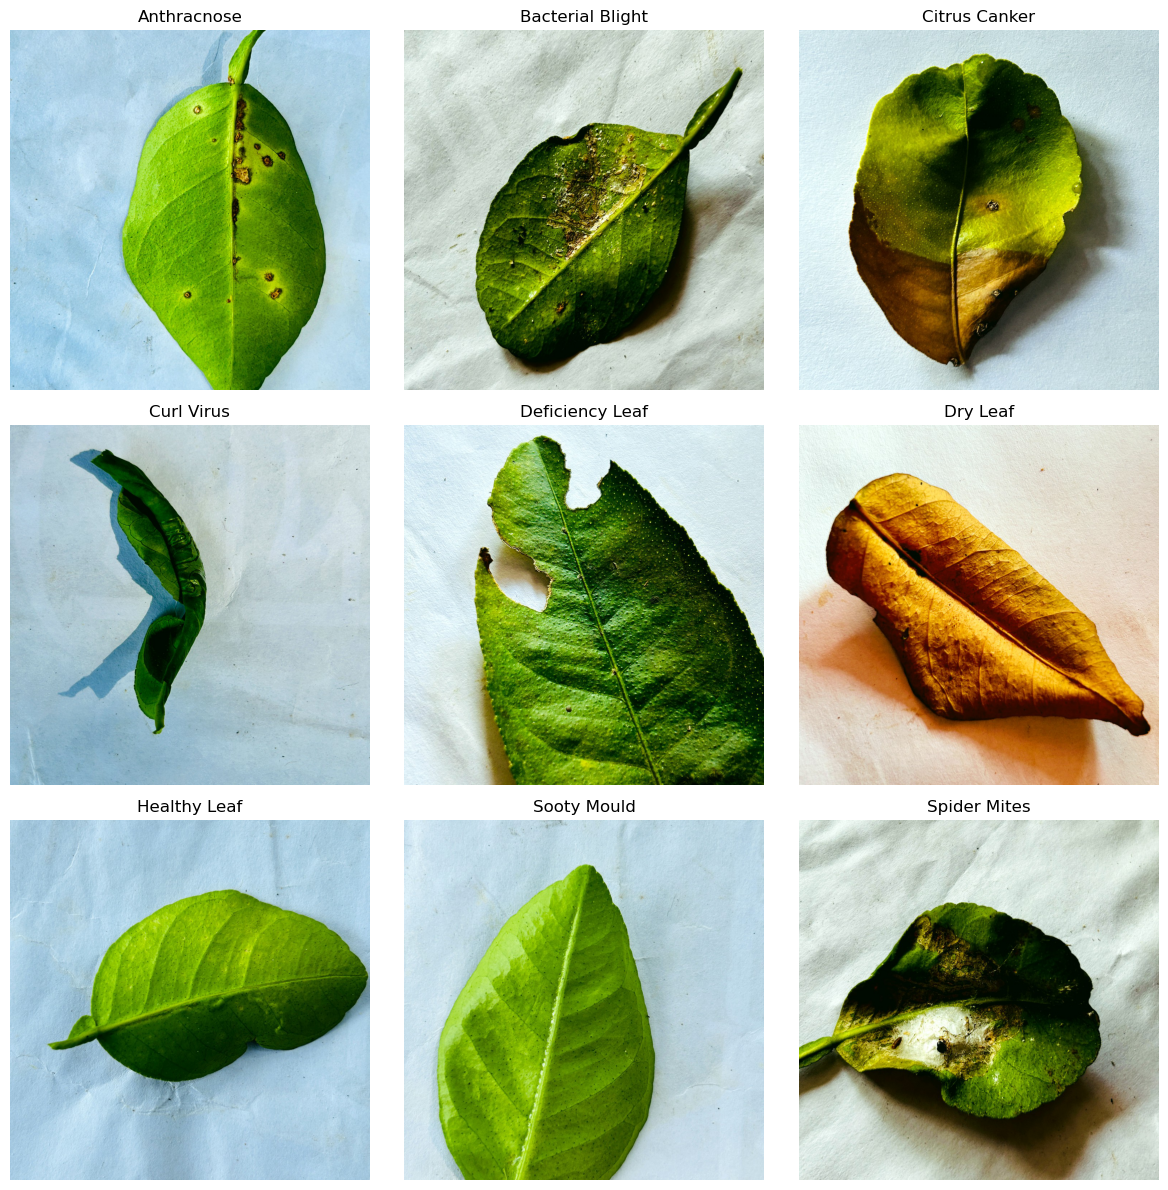

In [3]:
cols = 3
rows = (len(clases) + cols - 1) // cols

plt.figure(figsize=(cols * 4, rows * 4))

for i, clase in enumerate(clases):
    carpeta = os.path.join(dataset_path, clase)
    imagenes = [f for f in os.listdir(carpeta) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if imagenes:
        img_path = os.path.join(carpeta, imagenes[0])
        with Image.open(img_path) as img:
            plt.subplot(rows, cols, i + 1)
            plt.imshow(img)
            plt.title(clase)
            plt.axis('off')

plt.tight_layout()
plt.show()

# Dataset Augmented

                  Cantidad de imágenes
Anthracnose                       1000
Bacterial Blight                  1000
Citrus Canker                     1000
Curl Virus                        1000
Deficiency Leaf                   1000
Dry Leaf                          1000
Healthy Leaf                      1000
Sooty Mould                       1000
Spider Mites                      1000


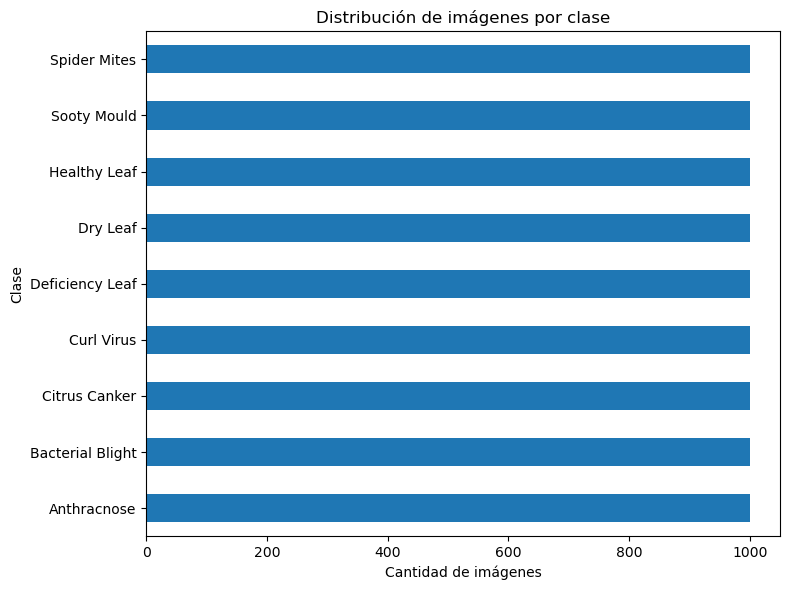

Tamaños más comunes:
(1000, 1000)    45
Name: count, dtype: int64


In [7]:
dataset_path = './data/Augmented Dataset'

# Obtener nombres de clases
clases = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Contar imágenes por clase
conteo = {}
tamaños = []

for clase in clases:
    carpeta = os.path.join(dataset_path, clase)
    imagenes = [f for f in os.listdir(carpeta) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    conteo[clase] = len(imagenes)
    
    for img_file in imagenes[:5]:  # analizamos las primeras 5 imágenes por clase
        img_path = os.path.join(carpeta, img_file)
        with Image.open(img_path) as img:
            tamaños.append(img.size)  # (ancho, alto)

# Mostrar conteo por clase
df_conteo = pd.DataFrame.from_dict(conteo, orient='index', columns=['Cantidad de imágenes'])
print(df_conteo)

# Visualizar clases con gráfico de barras
df_conteo.sort_values('Cantidad de imágenes').plot(kind='barh', figsize=(8, 6), legend=False)
plt.title('Distribución de imágenes por clase')
plt.xlabel('Cantidad de imágenes')
plt.ylabel('Clase')
plt.tight_layout()
plt.show()

# Tamaños más comunes
df_tamaños = pd.Series(tamaños).value_counts().head(5)
print("Tamaños más comunes:")
print(df_tamaños)

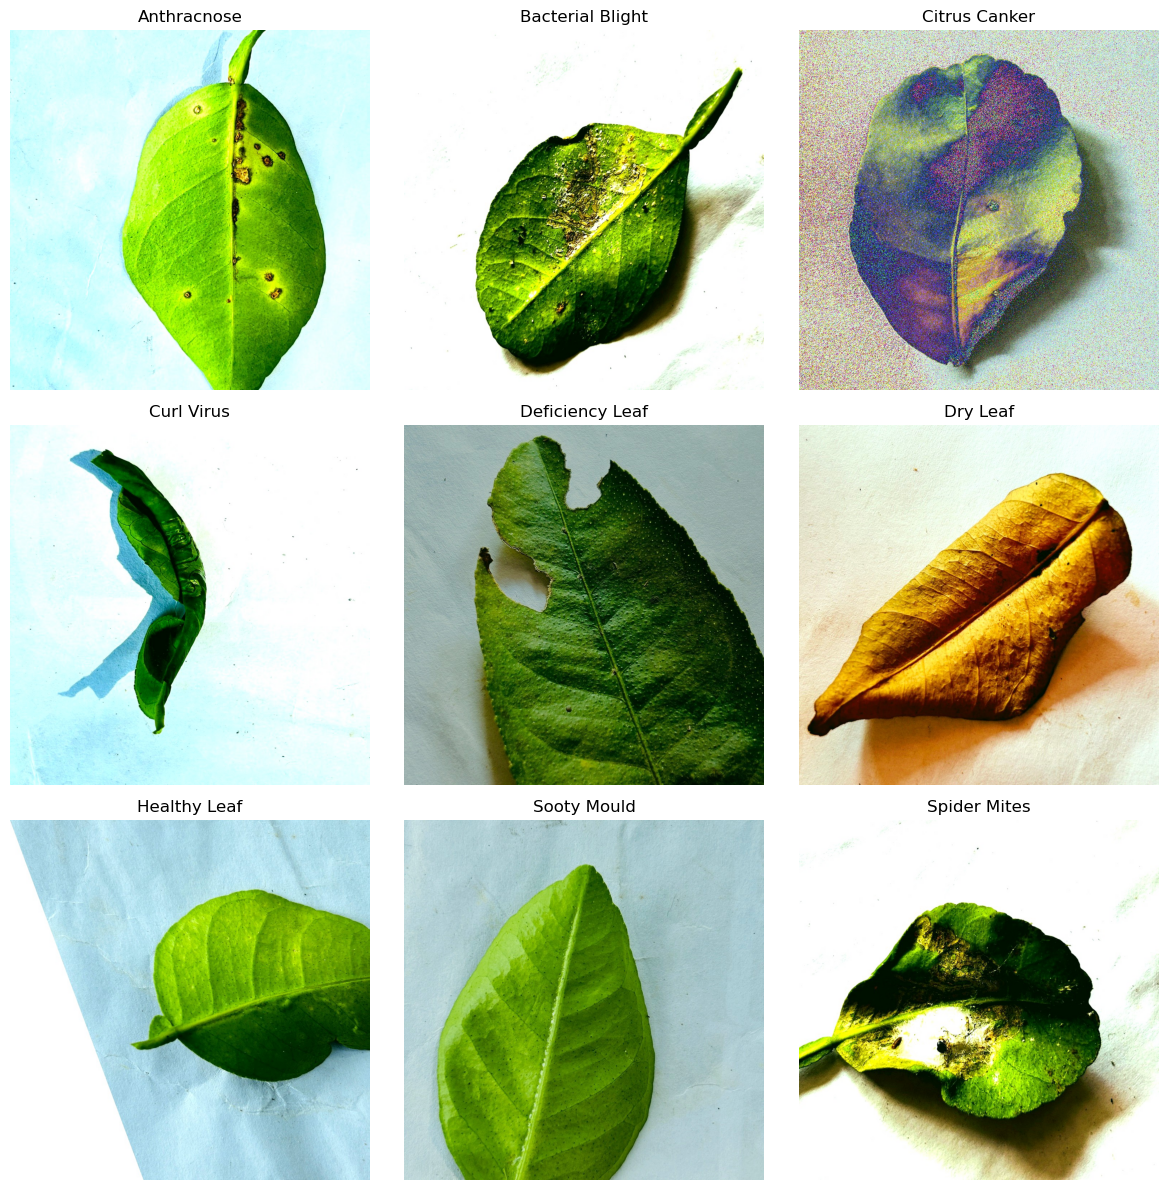

In [8]:
cols = 3
rows = (len(clases) + cols - 1) // cols

plt.figure(figsize=(cols * 4, rows * 4))

for i, clase in enumerate(clases):
    carpeta = os.path.join(dataset_path, clase)
    imagenes = [f for f in os.listdir(carpeta) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if imagenes:
        img_path = os.path.join(carpeta, imagenes[0])
        with Image.open(img_path) as img:
            plt.subplot(rows, cols, i + 1)
            plt.imshow(img)
            plt.title(clase)
            plt.axis('off')

plt.tight_layout()
plt.show()